Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



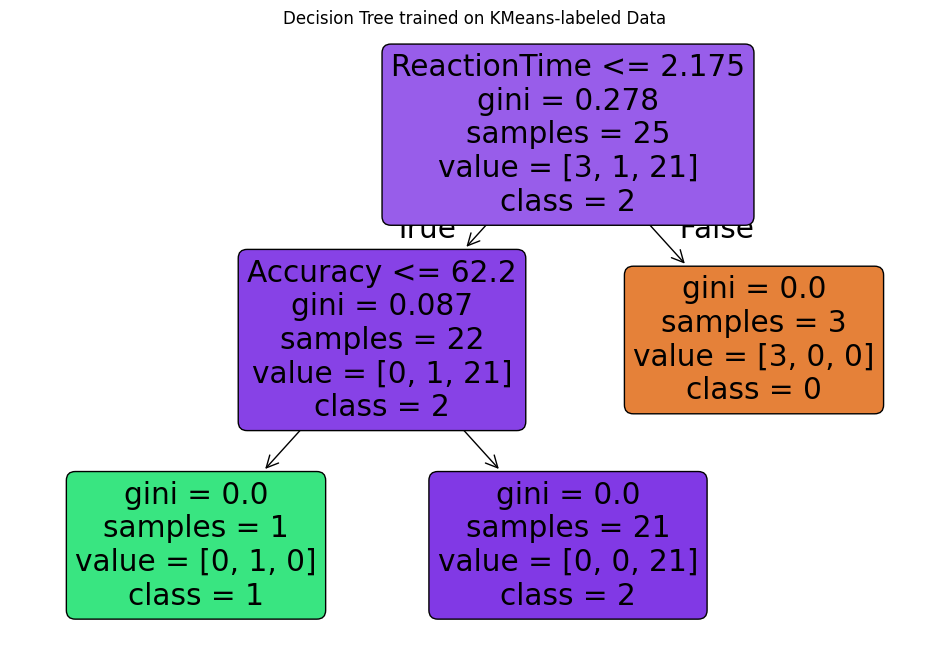

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# ---- Step 1: Create dataset ----
data = {
    "No": list(range(1, 33)),
    "Name": [
        "FARHIN","URMI","FIHA","MISTY","TITHI","FAHIMA","NAIMUR","HAMEEM",
        "RIJON","SANI","SUMU","ARPA","RADIBA","AISHI","NAZIA","FIFI","SHAHRIN",
        "RAHMAN","SHANNI","SADIA","NAHID","ARIYAN","SABIA","SHAKIA","NAFISA",
        "SULTANA","EUSHA","MEHNAZ","OISHI","SADEK","WAHID","TORY"
    ],
    "Accuracy": [
        98.1,100,90.1,97.0,93.1,95.4,98.5,97.5,97.8,94.9,90.7,100,98.1,34.3,99.1,
        98.9,99.1,99.3,97.8,97.6,96.7,98.7,98.1,97.4,100,97.8,100,100,99.4,97.6,
        99.2,99.3
    ],
    "ReactionTime": [
        1.71,1.64,1.99,1.81,1.81,1.68,1.37,1.49,0.97,1.52,1.53,1.77,3.34,1.68,
        1.66,1.97,1.69,1.29,1.01,1.47,0.93,1.15,3.34,2.36,1.58,1.34,1.44,1.72,
        1.09,1.08,1.52,1.36
    ]
}

df = pd.DataFrame(data)

# ---- Step 2: Standardize features ----
X = df[["Accuracy", "ReactionTime"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Step 3: Generate labels using KMeans ----
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# ---- Step 4: Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(X, df["Cluster"], test_size=0.2, random_state=42)

# ---- Step 5: Train Decision Tree ----
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# ---- Step 6: Predictions ----
y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---- Step 7: Visualize Decision Tree ----
plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=["Accuracy", "ReactionTime"], class_names=[str(c) for c in dt_model.classes_], filled=True, rounded=True)
plt.title("Decision Tree trained on KMeans-labeled Data")
plt.show()
